In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from random import choice
import math

## Defaut graph

Specify a named graph for reproducible execution of runs.

In [4]:
entry_nodes = [1]
core_nodes = [2,3,4]
exit_nodes = [5]

In [5]:
edges = [
    (1,2),
    (2,3),
    (3,4),
    (4,2),
    (4,5)
]

In [6]:
g = nx.DiGraph()
g.add_edges_from(edges)

In [7]:
g = RandGraph(graph_type='simple', actors=1000, moving=10)

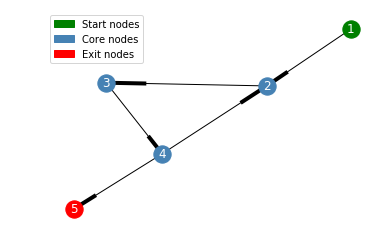

In [8]:
g.plot()

## Hongo district

In [9]:
entry_nodes = list(range(1,11))
exit_nodes = list(range(11,24))

In [10]:
# core node capacity
capa = pd.read_csv('../data/core_node_capacity.csv')

In [76]:
core_nodes = [(x[1], {'capacity': x[2]}) for x in capa.itertuples()]

In [85]:
capa.node.tolist()

[24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [78]:
g = nx.DiGraph()

In [79]:
g.add_nodes_from(entry_nodes)
g.add_nodes_from(exit_nodes)
g.add_nodes_from(core_nodes)

In [80]:
nx.set_node_attributes(g, None, 'actors')

### add edges

In [15]:
# entry edges
entry_edges = pd.read_csv('../data/entry_edges_Hongo_district.csv', header=None)

In [61]:
entry_edges_tpl = [(x[1],x[2]) for x in entry_edges.itertuples()]

In [17]:
# exit edges
exit_edges = pd.read_csv('../data/exit_edges_Hongo_district.csv', header=None)

In [66]:
exit_edges_tpl = [(x[1],x[2]) for x in exit_edges.itertuples()]

In [39]:
# core nodes edges
core_edges = pd.read_csv('../data/core_edge_list_Hongo_district.csv')

In [20]:
core_edges.head()

,head_node,tail_node_1,tail_node_2,tail_node_3,tail_node_4,tail_node_5,tail_node_6
0,24,25,30,NaN,NaN,NaN,NaN
1,25,24,26,NaN,NaN,NaN,NaN
2,26,25,27,28.0,NaN,NaN,NaN
3,27,26,28,NaN,NaN,NaN,NaN
4,28,26,27,29.0,31.0,NaN,NaN


In [41]:
edg_lst = []
for col in core_edges:
    if col != 'head_node':
        head_val = core_edges['head_node'].values
        tail_val = core_edges[col].values
        edg_lst.append([(x, y) for x,y in zip(head_val, tail_val)])
core_edge_list = [(x[0],int(x[1])) for y in edg_lst for x in y if not math.isnan(float(x[1]))]

In [42]:
len(core_edge_list)

537

In [43]:
core_edge_list[:3]

[(24, 25), (25, 24), (26, 25)]

In [81]:
# add edges
g.add_edges_from(entry_edges_tpl)
g.add_edges_from(exit_edges_tpl)
g.add_edges_from(core_edge_list)

## Plot

In [45]:
import matplotlib.patches as mpatches

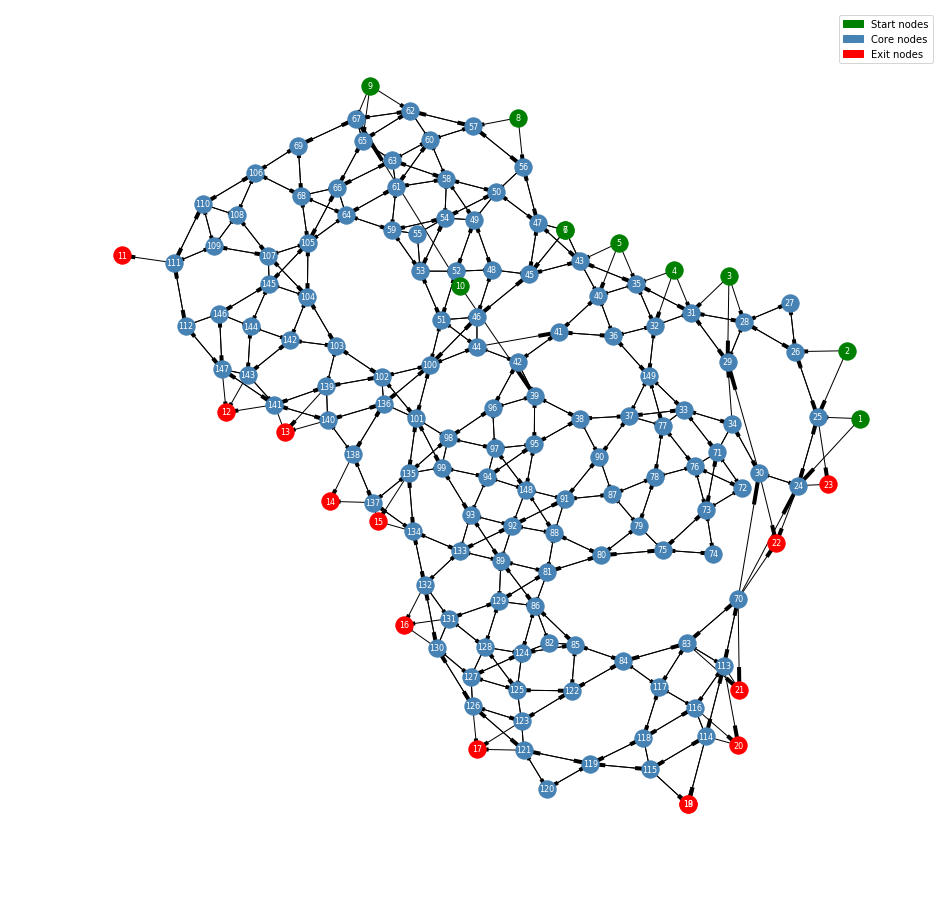

In [84]:
plt.figure(figsize=(16,16))
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx_edges(g, pos)

nx.draw_networkx_nodes(g, pos, node_color='steelblue', nodelist=[x[0] for x in core_nodes])
nx.draw_networkx_nodes(g, pos, node_color='g', nodelist=entry_nodes)
nx.draw_networkx_nodes(g, pos, node_color='r', nodelist=exit_nodes)

nx.draw_networkx_labels(g, pos, font_color='w', font_size=8)

plt.axis('off')

blue_patch = mpatches.Patch(color='steelblue', label='Core nodes')
red_patch = mpatches.Patch(color='r', label='Exit nodes')
green_patch = mpatches.Patch(color='g', label='Start nodes')

plt.legend(handles=[green_patch,blue_patch,red_patch])

plt.show()

## Graph loading

In [88]:
h = RandGraph(graph_type='hongo_district')

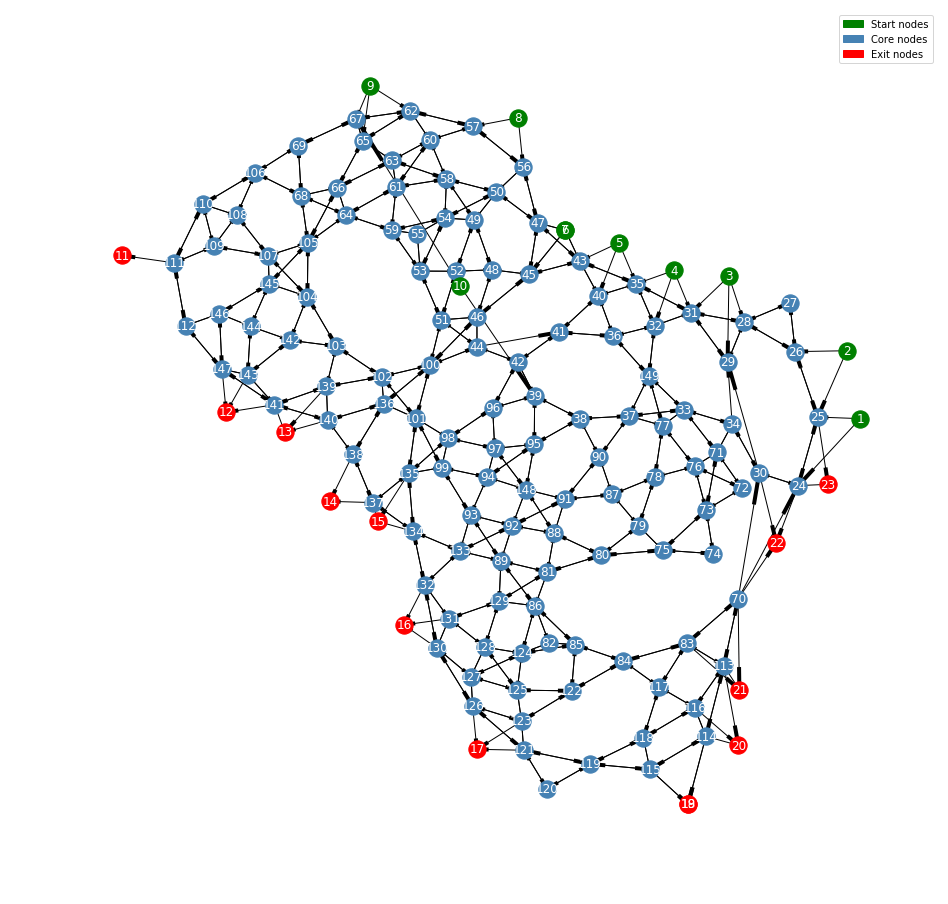

In [90]:
h.plot(fig_size=(16,16))